<a name='4'></a>
## 4 - The Functional API

We'll use Keras' flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build a ConvNet that can differentiate between 6 sign language digits. 

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs.

<a name='1'></a>
## 1 - Packages

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [3]:
def load_signs_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 2


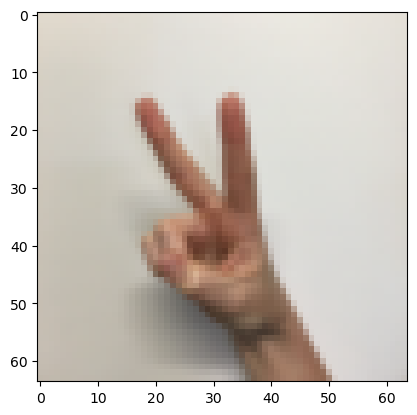

In [9]:
# Example of an image from the dataset

index = 4
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [12]:
# Scale and prepare the data set
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [13]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
   
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(8, (4,4), strides = (1, 1), padding = 'same')(input_img)
    ## RELU
    A1 = tfl.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding ="same")(A1) 
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(16, (2,2), strides = (1, 1), padding ="same")(P1)
    ## RELU
    A2 = tfl.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 =  tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding ="same")(A2) 
    ## FLATTEN
    F =tfl.Flatten()(P2)
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tfl.Dense(6, activation='softmax')(F)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model


In [14]:
conv_model = convolutional_model((64, 64, 3))

conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [15]:
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0     

<a name='4-4'></a>
### 4.4 - Train the Model

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 31ms/step - loss: 1.7965 - accuracy: 0.1722 - val_loss: 1.7892 - val_accuracy: 0.2167
Epoch 2/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7873 - accuracy: 0.2037 - val_loss: 1.7867 - val_accuracy: 0.2083
Epoch 3/100
17/17 [==============================] - 0s 27ms/step - loss: 1.7839 - accuracy: 0.2426 - val_loss: 1.7834 - val_accuracy: 0.2917
Epoch 4/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7801 - accuracy: 0.2944 - val_loss: 1.7798 - val_accuracy: 0.2917
Epoch 5/100
17/17 [==============================] - 0s 27ms/step - loss: 1.7752 - accuracy: 0.2796 - val_loss: 1.7757 - val_accuracy: 0.3083
Epoch 6/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7700 - accuracy: 0.3074 - val_loss: 1.7718 - val_accuracy: 0.3417
Epoch 7/100
17/17 [==============================] - 0s 28ms/step - loss: 1.7646 - accuracy: 0.3130 - val_loss: 1.7645 - val_accuracy: 0.3833
Epoch 

17/17 [==============================] - 0s 26ms/step - loss: 0.5807 - accuracy: 0.8213 - val_loss: 0.6784 - val_accuracy: 0.7333
Epoch 59/100
17/17 [==============================] - 0s 27ms/step - loss: 0.5729 - accuracy: 0.8241 - val_loss: 0.6721 - val_accuracy: 0.7333
Epoch 60/100
17/17 [==============================] - 0s 27ms/step - loss: 0.5657 - accuracy: 0.8250 - val_loss: 0.6660 - val_accuracy: 0.7333
Epoch 61/100
17/17 [==============================] - 0s 26ms/step - loss: 0.5590 - accuracy: 0.8250 - val_loss: 0.6607 - val_accuracy: 0.7417
Epoch 62/100
17/17 [==============================] - 0s 26ms/step - loss: 0.5521 - accuracy: 0.8259 - val_loss: 0.6559 - val_accuracy: 0.7417
Epoch 63/100
17/17 [==============================] - 0s 24ms/step - loss: 0.5456 - accuracy: 0.8269 - val_loss: 0.6497 - val_accuracy: 0.7583
Epoch 64/100
17/17 [==============================] - 0s 23ms/step - loss: 0.5389 - accuracy: 0.8269 - val_loss: 0.6451 - val_accuracy: 0.7583
Epoch 65/100

In [18]:
# To see accuracy and loss history
history.history

{'loss': [1.7965136766433716,
  1.7872589826583862,
  1.7838990688323975,
  1.7800782918930054,
  1.7751855850219727,
  1.769987940788269,
  1.7645797729492188,
  1.7569074630737305,
  1.7472003698349,
  1.7343928813934326,
  1.7161228656768799,
  1.6924492120742798,
  1.6623493432998657,
  1.6263823509216309,
  1.5851026773452759,
  1.538575530052185,
  1.4886916875839233,
  1.4359290599822998,
  1.3826838731765747,
  1.330840826034546,
  1.2813262939453125,
  1.2382289171218872,
  1.1964505910873413,
  1.1563727855682373,
  1.1207149028778076,
  1.0879106521606445,
  1.0552510023117065,
  1.0247100591659546,
  0.9975470900535583,
  0.9695336222648621,
  0.9448451995849609,
  0.9213311672210693,
  0.8986632823944092,
  0.878046989440918,
  0.8580464720726013,
  0.8395224809646606,
  0.8211969137191772,
  0.8039849400520325,
  0.7873022556304932,
  0.7716609835624695,
  0.7576923370361328,
  0.7433853149414062,
  0.7296452522277832,
  0.7176188826560974,
  0.7046363353729248,
  0.69253

In [19]:
acc= history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

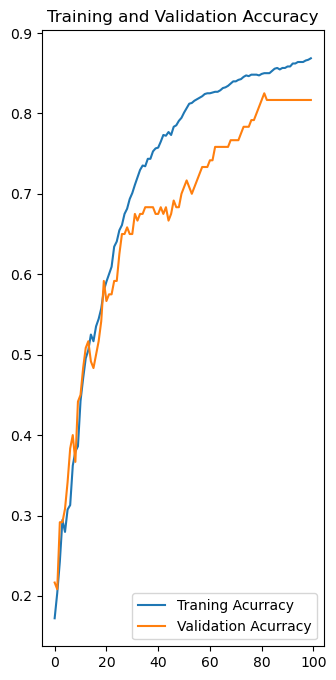

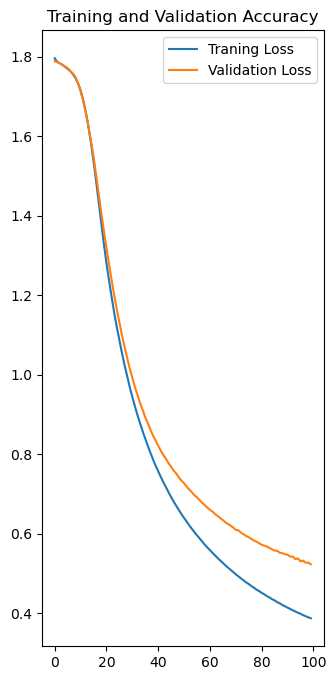

In [20]:
EPOCH = 100
plt.figure(figsize =(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label ='Traning Acurracy')
plt.plot(range(EPOCH), val_acc, label ='Validation Acurracy')
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# plt.axis("off")

plt.figure(figsize =(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), loss, label ='Traning Loss')
plt.plot(range(EPOCH), val_loss, label ='Validation Loss')
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")

### References:
https://www.coursera.org/specializations/deep-learning